# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [88]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [89]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [90]:
# read the data
df = pd.read_csv('/Users/nadiyazaver/Desktop/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [91]:
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [92]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [93]:
# Write your code here
# Finding null values in each series
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [94]:
# Write your code here
# The .describe method or the .mean(), .median(), .max() functions can be used
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [95]:
# Write the code here
# Finding all the rows where the rating column has value equal to 'Not given' and using the first value as the row count
df[df['rating'] == 'Not given'].shape

(736, 9)

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

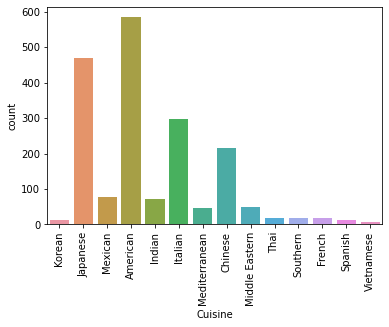

In [96]:
# Write the code here
#Count plot to visualize most popular cuisine types
sns.countplot(data = df, x = 'cuisine_type');
plt.xticks(rotation = 90, );
plt.xlabel('Cuisine');


***

Observation

The most popular cuisine is American.

The least popular cuisine is Vietnamese.


***


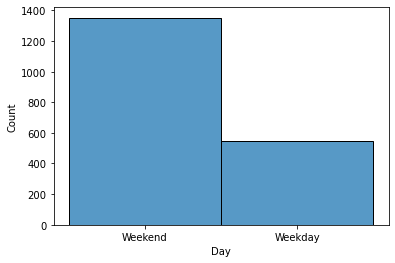

In [97]:
#Histogram to visualize frequency of orders in weekdays vs weekends
sns.histplot(data = df, x = 'day_of_the_week')
plt.xlabel('Day');

***

Observation

Customers order more on the weekends compared to weekdays

***


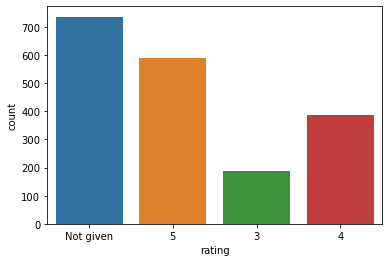

In [98]:
#Box plot to visualize rating distribution
sns.countplot(data = df, x = 'rating');

***

Observation

The most frequent value for ratings is 'Not given'.

There are no ratings of 1 or 2.

***

The average:  16.498851422550082


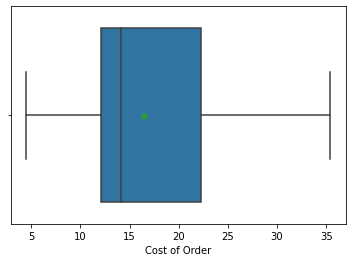

In [99]:
#Box plot to visualize the distribution of cost per order
sns.boxplot(data = df, x ='cost_of_the_order', showmeans = True);
plt.xlabel('Cost of Order');
print("The average: ", df['cost_of_the_order'].mean())

***
Observation


The average cost of the orders is 16 dollars and 50 cents.

Half of customer orders are less than 14 dollars, while the other half are more than 14 dollars. 

***

The average:  27.371970495258168


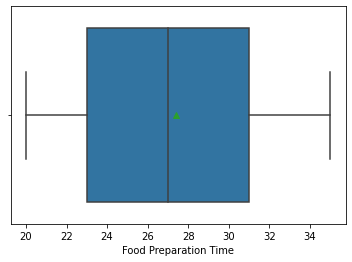

In [100]:
#Box plot to visualize food preparation time distribution
sns.boxplot(data = df, x = 'food_preparation_time', showmeans = True)
plt.xlabel('Food Preparation Time');
print("The average: ", df['food_preparation_time'].mean())

***
Observation


The average food preparation time is 27 minutes and 37 seconds.

50% of orders are prepared under 27 minutes and the other 50% have preparation times of more than 27 minutes. 

The food preparation time has a normal distribution containing no outliers.
***

The average:  24.161749209694417


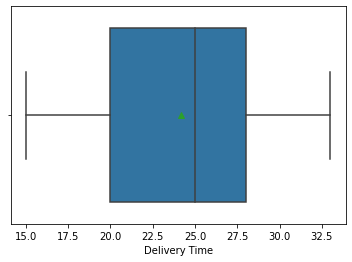

In [101]:
sns.boxplot(data = df, x = 'delivery_time', showmeans= True)
plt.xlabel('Delivery Time');
print("The average: ", df['delivery_time'].mean())

***
Observation


The average delivery time is 24 minutes.

50% of order delivery times are under 25 minutes, and the other 50% order delivery times are more than 25 minutes.
***

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [102]:
# Top 5 restaurants to receive orders
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top 5 restaurants are:
- Shake Shack
- The Meatball Shop
- Blue Ribbon Sushi
- Blue Ribbon Fried Chicken
- Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [103]:
# Write the code here
df1 = df[df['day_of_the_week'] == 'Weekend']
df1['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

American cuisine is the most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [104]:
# Write the code here
df1 = df[df['cost_of_the_order'] > 20]
(df1.shape[0]*100)/df.shape[0]

29.24130663856691

#### Observations:
29% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [105]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [106]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customer 52832 has placed 13 orders

Customer 47440 has placed 10 orders

Customer 83287 has placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


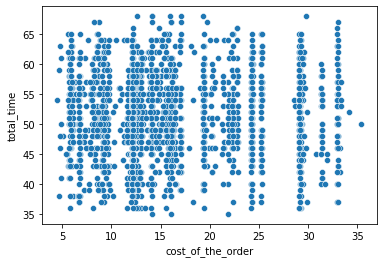

In [107]:
# Write the code here
df['total_time'] = df['food_preparation_time']+df['delivery_time']
sns.scatterplot(data = df, x = 'cost_of_the_order', y = 'total_time');

Observation: The cost of the order does not impact the total time it takes to deliver the order to customer.

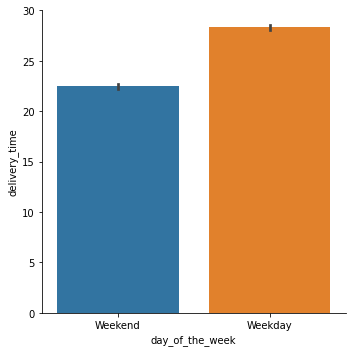

In [108]:
sns.catplot(data = df, x ='day_of_the_week', y = 'delivery_time', kind = 'bar');

Observation: The delivery time on a weekday is longer than the weekend.

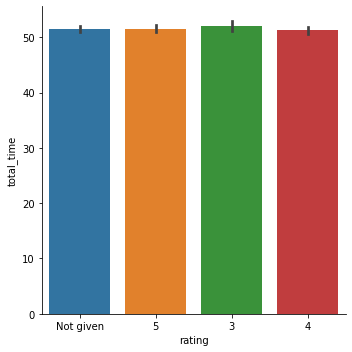

In [109]:
sns.catplot(data = df, x = 'rating', y = 'total_time', kind = 'bar');

Observation: The total time does not impact the overall ratings.

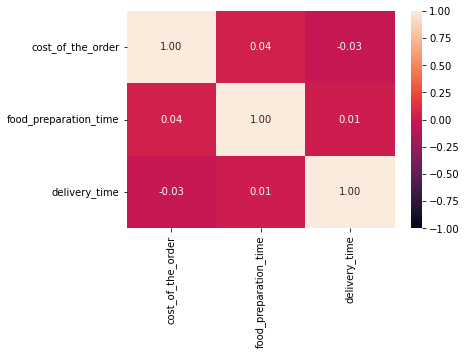

In [110]:
numerical_variables = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[numerical_variables].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

[]

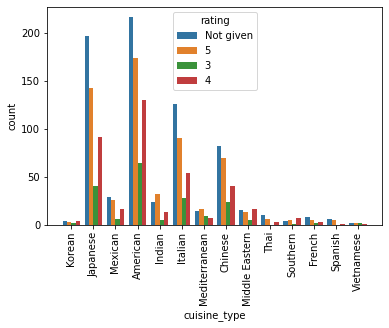

In [111]:
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating')
plt.xticks(rotation = 90);
plt.plot(figsize = (50,50))

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [112]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 



,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [113]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
rest_names
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [114]:
# Write the code here
def net_revenue(x):
    if x > 20:
        return x*0.25
    if x > 5:
        return x*0.15
    else:
        return x*0
    
df['Revenue'] = df['cost_of_the_order'].apply(net_revenue)
df.head()
total_revenue = df['Revenue'].sum()
print('The net revenue is around', round(total_revenue), 'dollars.')

The net revenue is around 6166 dollars.


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [115]:
# Write the code here
total_time = df[df['total_time']>60]
more_than_60 = round((total_time.shape[0]*100)/df.shape[0])
print(more_than_60, "percent of orders take more than 60 minutes.")

11 percent of orders take more than 60 minutes.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

The average delivery time on weekends is  22 minutes.
The average delivery time on weekday is 28 minutes.


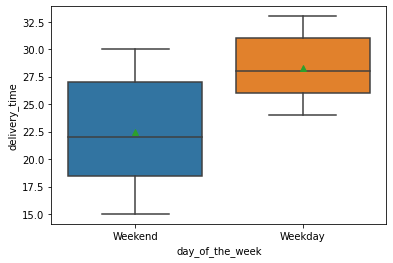

In [116]:
# Write the code here
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', showmeans = True);
weekend = df[df['day_of_the_week'] == 'Weekend']
weekday = df[df['day_of_the_week'] == 'Weekday']
print("The average delivery time on weekends is ", round(weekend['delivery_time'].mean()), "minutes.")
print("The average delivery time on weekday is",round( weekday['delivery_time'].mean()), "minutes.")

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [117]:
#Number of American restaurants available on the app
most_popular = df[df['cuisine_type'] == 'American']
most_popular['restaurant_name'].value_counts().shape
#Number of Vietnamese restaurants available on the app
least_popular = df[df['cuisine_type'] == 'Vietnamese']
least_popular['restaurant_name'].value_counts().shape

(3,)

### Conclusions:
* The average delivery time on a weekday is 6 minutes more than a weekend. 
* The restaurant with the most rating count and highest average rating is The Meatball Shop. 
* The popular cuisine types are American, Japanese, Indian, and Chinese respectively. 
* There are 41 different kinds of American restaurants to choose from which makes up  23 % of the restaurants available. 
* There are 3 different kinds of Vietnamese restaurants to choose from which makes up 1.7 % of the restaurants available.
* American and Japanese have the most 5 star ratings, respectively. 

### Recommendations:

*  Inspect available driver count during the week to decrease the average delivery time. 
* Gather data that documents months to determine peak seasons. 
* The month column will also display which month customers prefer to stay in and use the app. 
* Add more Vietnamese options on the app to avoid bias based on availbility.
* To increase net revenue, add a reward system based on total cost per order and the count of those orders to encourage customers to use the app frequently.
* Allow customers to input restaurant of their choice as feedback, in the case it is not available on the app. This data can be utilized in the future to determine which new restaurants the app should add. 
* Add data relating to the weather and cross reference order count to conclude if bad weather results in increased number of orders. 
* Find days the the most order counts and cross refrence with holidays or special events such as a sports game. Add promotions based on those orders to increase net revenue
* Add a timestamp to determine peak times, and confirm that enough delivery drivers are available (such as lunch time, or after work)

---